In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import corner, os, glob, json
import numpy as np
import pandas as pd
from scipy.constants import golden_ratio
%matplotlib inline

In [3]:
width = 3.36 # 242 pt
base_size = np.array([1, 1/golden_ratio])
fig_size = width * base_size
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman']})#,'weight':'bold'})

In [4]:
#Reference directory
topdir = os.getcwd()

cw_dir = topdir + '/CaitlinCW/final'

#Open 3b
cw_open_3b_dir_cw_noise = cw_dir + '/combo_open_3b_cwnoise'
#Still Running
cw_open_3b_dir_cw_noise_sampled = cw_dir + '/combo_open_3b_sample'
cw_open_3b_dir_wrong_noise = cw_dir + '/combo_open_3b_wrongnoise'

#Closed 1
cw_closed_1_dir = cw_dir + '/combo_closed1_cwnoise'
#Closed 2
cw_closed_2_dir = cw_dir + '/combo_closed2_cwnoise'
#Closed 3
cw_closed_3_dir = cw_dir + '/double_5_17'

#Reference directory

histdir = topdir + '/Hists'
figdir = topdir + '/Figures'
#Where the truth values for the open datatset are
truthfile = topdir + '/mdc2/group1/group1_gw_parameters.json'

In [5]:
#Load truth values for open dataset
with open(truthfile) as tf:
    truths = json.load(tf)
    tf.close()
    
truth_params_1b = []
truth_vals_1b = []
truth_params_2b = []
truth_vals_2b = []
truth_params_3b = []
truth_vals_3b = []

for dataset, info in truths.items():
    for truth_params, truth_vals in info.items():
        if dataset == 'dataset1':
            truth_params_1b.append(truth_params)
            truth_vals_1b.append(truth_vals)
        if dataset == 'dataset2':
            truth_params_2b.append(truth_params)
            truth_vals_2b.append(truth_vals)
        if dataset == 'dataset3':
            truth_params_3b.append(truth_params)
            truth_vals_3b.append(truth_vals)

In [6]:
brent_open_1b = np.load(histdir+'/brent_open_1b.npz')
brent_open_2b = np.load(histdir+'/brent_open_2b.npz')

will_open_1b = np.load(histdir+'/will_open_1b.npz')
will_open_2b = np.load(histdir+'/will_open_2b.npz')
will_open_3b = np.load(histdir+'/will_open_3b.npz')

closed_1 = np.load(histdir+'/closed_1.npz')
closed_2 = np.load(histdir+'/closed_2.npz')
closed_3 = np.load(histdir+'/closed_3.npz')

In [7]:
print(brent_open_1b.files)

['brent_hist_open_1b_1', 'brent_bin_edges_open_1b_1', 'brent_hist_open_1b_2', 'brent_bin_edges_open_1b_2', 'brent_hist_open_1b_3', 'brent_bin_edges_open_1b_3', 'brent_hist_open_1b_4', 'brent_bin_edges_open_1b_4']


In [25]:
def SaveFigure(figure,filename):
    fileloc = topdir + '/Figures/'
    if os.path.exists(fileloc) == False:
        os.mkdir(fileloc)
    figure.savefig(fileloc + filename,bbox_inches='tight')

In [8]:
def PlotGWBHistograms(bin_edges,hist,legendlabel,colour,truthval=0.0,\
                   xpos=.2,ypos=.6,labelsize=10,textsize=8,linewidth=1.25,linestyle='-',legendloc = 'upper left'):
    Amp = r'${\rm log}_{10}(A_{\rm GWB})$'
    plt.yscale('log')
    plt.xlabel(Amp,fontsize=labelsize)
    plt.ylabel('Probablility Density')
    plt.legend(loc = legendloc,fontsize=textsize)
    plt.hist(bin_edges[:-1], bins = bin_edges, weights = hist, density = True,histtype = 'step',label = legendlabel,\
                 color=colour,lw = linewidth,ls = linestyle)
    
    if truthval != 0.0 and truthval != 10**0.0:  
        plt.axvline(x=truthval, linestyle = '--', color = 'k', label = 'Injected',linewidth=linewidth)

# Open 1b

No handles with labels found to put in legend.


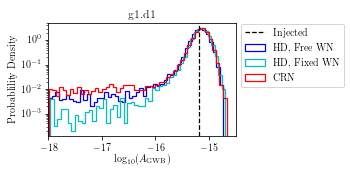

In [26]:
fig = plt.figure(figsize=fig_size)


PlotGWBHistograms(will_open_1b['will_bin_edges_open_1b_1'],will_open_1b['will_hist_open_1b_1'],'HD, Free WN','b')
PlotGWBHistograms(will_open_1b['will_bin_edges_open_1b_2'],will_open_1b['will_hist_open_1b_2'],'HD, Fixed WN','c')
PlotGWBHistograms(will_open_1b['will_bin_edges_open_1b_3'],will_open_1b['will_hist_open_1b_3'],'CRN','r',truthval=truth_vals_1b[0])

plt.title('g1.d1')
plt.xlim((-18,-14.5))
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
#SaveFigure(fig,'open_1b_final.pdf')
plt.show()

### Open 1b ephem

No handles with labels found to put in legend.


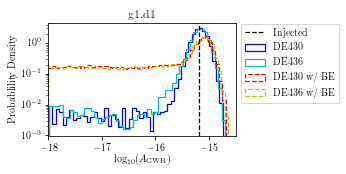

In [28]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(brent_open_1b['brent_bin_edges_open_1b_1'],brent_open_1b['brent_hist_open_1b_1'],'DE430','b')
PlotGWBHistograms(brent_open_1b['brent_bin_edges_open_1b_3'],brent_open_1b['brent_hist_open_1b_3'],'DE436','c')
PlotGWBHistograms(brent_open_1b['brent_bin_edges_open_1b_2'],brent_open_1b['brent_hist_open_1b_2'],\
                  'DE430 w/ BE','r',linestyle = '--')
PlotGWBHistograms(brent_open_1b['brent_bin_edges_open_1b_4'],brent_open_1b['brent_hist_open_1b_4'],\
                  'DE436 w/ BE','y',linestyle = '--',truthval=truth_vals_1b[0])
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
plt.title('g1.d1')
plt.xlim((-18,-14.5))
#SaveFigure(fig,'open_1b_ephemerides_final.pdf')
plt.show()

# Open 2b

No handles with labels found to put in legend.


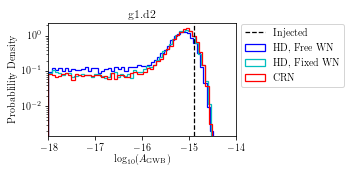

In [30]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(will_open_2b['will_bin_edges_open_2b_1'],will_open_2b['will_hist_open_2b_1'],'HD, Free WN','b')
PlotGWBHistograms(will_open_2b['will_bin_edges_open_2b_2'],will_open_2b['will_hist_open_2b_2'],'HD, Fixed WN','c')
PlotGWBHistograms(will_open_2b['will_bin_edges_open_2b_3'],will_open_2b['will_hist_open_2b_3'],'CRN','r',truthval=truth_vals_2b[0])

plt.title('g1.d2')
plt.xlim((-18,-14))
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
#SaveFigure(fig,'open_2b_final.pdf')
plt.show()

### Open 2b ephem

No handles with labels found to put in legend.


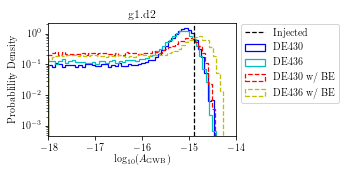

In [31]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(brent_open_2b['brent_bin_edges_open_2b_1'],brent_open_2b['brent_hist_open_2b_1'],'DE430','b')
PlotGWBHistograms(brent_open_2b['brent_bin_edges_open_2b_3'],brent_open_2b['brent_hist_open_2b_3'],'DE436','c')
PlotGWBHistograms(brent_open_2b['brent_bin_edges_open_2b_2'],brent_open_2b['brent_hist_open_2b_2'],\
                  'DE430 w/ BE','r',linestyle = '--')
PlotGWBHistograms(brent_open_2b['brent_bin_edges_open_2b_4'],brent_open_2b['brent_hist_open_2b_4'],\
                  'DE436 w/ BE','y',linestyle = '--',truthval=truth_vals_2b[0])
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
plt.title('g1.d2')
plt.xlim((-18,-14))
#SaveFigure(fig,'open_2b_ephemerides_final.pdf')
plt.show()

# Open 3b

No handles with labels found to put in legend.


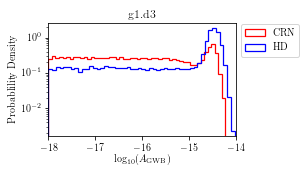

In [32]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(will_open_3b['will_bin_edges_open_3b_3'],will_open_3b['will_hist_open_3b_3'],'CRN','r')
PlotGWBHistograms(will_open_3b['will_bin_edges_open_3b_1'],will_open_3b['will_hist_open_3b_1'],'HD','b')
plt.title('g1.d3')
plt.xlim((-18,-14))
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
#SaveFigure(fig,'open_3b_final.pdf')
plt.show()

# Closed 1

No handles with labels found to put in legend.


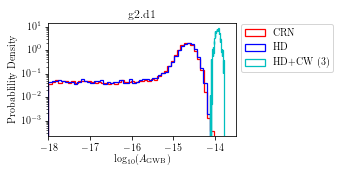

In [33]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(closed_1['will_bin_edges_closed_1_2'],closed_1['will_hist_closed_1_2'],'CRN','r')
PlotGWBHistograms(closed_1['will_bin_edges_closed_1_1'],closed_1['will_hist_closed_1_1'],'HD','b')
PlotGWBHistograms(closed_1['caitlin_bin_edges_closed_1_cw_noise'],closed_1['caitlin_hist_closed_1_cw_noise'],'HD+CW (3)','c')

plt.title('g2.d1')
plt.xlim((-18,-13.5))
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
#SaveFigure(fig,'closed_1_final.pdf')
plt.show()

# Closed 2

In [20]:
print(closed_2.files)

['will_hist_closed_2_1', 'will_bin_edges_closed_2_1', 'will_hist_closed_2_2', 'will_bin_edges_closed_2_2', 'caitlin_hist_closed_2_cw_noise', 'caitlin_bin_edges_closed_2_cw_noise']


No handles with labels found to put in legend.


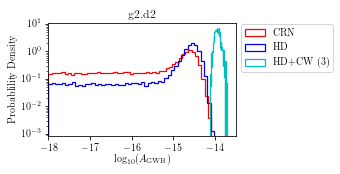

In [34]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(closed_2['will_bin_edges_closed_2_2'],closed_2['will_hist_closed_2_2'],'CRN','r')
PlotGWBHistograms(closed_2['will_bin_edges_closed_2_1'],closed_2['will_hist_closed_2_1'],'HD','b')
PlotGWBHistograms(closed_2['caitlin_bin_edges_closed_2_cw_noise'],closed_2['caitlin_hist_closed_2_cw_noise'],'HD+CW (3)','c')

plt.title('g2.d2')
plt.xlim((-18,-13.5))
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
#SaveFigure(fig,'closed_2_final.pdf')
plt.show()

# Closed 3

No handles with labels found to put in legend.


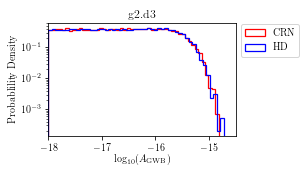

In [35]:
fig = plt.figure(figsize=fig_size)

PlotGWBHistograms(closed_3['will_bin_edges_closed_3_2'],closed_3['will_hist_closed_3_2'],'CRN','r')
PlotGWBHistograms(closed_3['will_bin_edges_closed_3_1'],closed_3['will_hist_closed_3_1'],'HD','b')

plt.title('g2.d3')
plt.xlim((-18,-14.5))
plt.legend(bbox_to_anchor=(1.0, 0.5*fig_size[1]))
#SaveFigure(fig,'closed_3_final.pdf')
plt.show()